<a href="https://colab.research.google.com/github/jedrekf1/PUMjfriska/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv("train.csv")

<ipython-input-6-ef2ff63de291>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train.csv")


In [7]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [8]:
df.shape

(100000, 28)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [10]:
df.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [11]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [12]:
df.drop_duplicates()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [13]:
df.shape

(100000, 28)

In [14]:
df['Age'] = df['Age'].astype(str).str.replace('_', '')

In [15]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'] = df['Age'].replace(np.nan, 0, regex=True)
print(df)
print(df.dtypes)

            ID Customer_ID     Month           Name  Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh   23  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh   23  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh -500  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh   23  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh   23  821-00-0265   
...        ...         ...       ...            ...  ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks   25  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks   25  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks   25  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks   25  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks   25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      Scientist      19114.12            

In [16]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [17]:
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')

In [18]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                           int64
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [19]:
df['Num_of_Loan']=pd.to_numeric(df['Num_of_Loan'], errors='coerce')

In [20]:
df['Num_of_Delayed_Payment']=pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')

In [21]:
df['Changed_Credit_Limit']=pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')

In [22]:
df['Outstanding_Debt']=pd.to_numeric(df['Outstanding_Debt'], errors='coerce')

In [23]:
df['Amount_invested_monthly']=pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')

In [24]:
df['Monthly_Balance']=pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')

In [25]:
df.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                           int64
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

In [26]:
df= df.drop(['ID','Customer_ID','Name','SSN'],axis = 'columns')

In [27]:
df.groupby('Credit_Score').count()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
Credit_Score,,,,,,,,,,,,,,,,,,,,,
Good,17828,17828,17828,16560,15070,17828,17828,17828,17005,14384,...,17487,17828,17626,17828,16224,17828,17828,16243,17828,16243
Poor,28998,28998,28998,26921,24641,28998,28998,28998,27584,27662,...,28437,28998,28727,28998,26396,28998,28998,26386,28998,26386
Standard,53174,53174,53174,49539,45287,53174,53174,53174,50626,46546,...,52111,53174,52638,53174,48350,53174,53174,48587,53174,48587


In [28]:
df.dtypes

Month                        object
Age                           int64
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                 float64
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                 object
dtype: object

In [29]:
FeaturesToConvert = ['Age', 'Annual_Income',
'Num_of_Loan', 'Num_of_Delayed_Payment',
'Changed_Credit_Limit', 'Outstanding_Debt',
'Amount_invested_monthly', 'Monthly_Balance']

In [30]:
df.isnull().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                6980
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                  4785
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       9746
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt             1009
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      8784
Payment_Behaviour               0
Monthly_Balance              8784
Credit_Score                    0
dtype: int64

In [31]:
df['Monthly_Inhand_Salary']= df['Monthly_Inhand_Salary'].fillna(method='pad')

In [46]:
df.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [33]:
df['Num_of_Loan']= df['Num_of_Loan'].fillna(method='pad')

In [34]:
df['Num_of_Delayed_Payment']= df['Num_of_Delayed_Payment'].fillna(method='pad')

In [35]:
df= df.drop(['Type_of_Loan','Credit_History_Age'],axis = 'columns')

In [36]:
df['Annual_Income']= df['Annual_Income'].fillna(method='pad')

In [37]:
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].fillna(method='pad')

In [38]:
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(method='pad')
df['Outstanding_Debt'] = df['Outstanding_Debt'].fillna(method='pad')

In [39]:
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(method='pad')
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(method='pad')

In [40]:
df['Age'].sort_values()

10365    -500
75049    -500
35504    -500
75044    -500
11227    -500
         ... 
13372    8674
82335    8678
35557    8682
82739    8697
71732    8698
Name: Age, Length: 100000, dtype: int64

In [41]:
recordslow = df[df['Age'] < 0]
recordslow.count()
print(recordslow)

          Month  Age    Occupation  Annual_Income  Monthly_Inhand_Salary  \
2         March -500     Scientist      19114.120            1824.843333   
113    February -500  Entrepreneur      25546.260            2415.855000   
289    February -500      Mechanic      29469.980            2227.831667   
340         May -500     Architect      20574.470            1740.539167   
560     January -500     Scientist     144546.720           11809.560000   
...         ...  ...           ...            ...                    ...   
99531     April -500        Lawyer       8974.555             783.879583   
99541      June -500     Scientist      34671.150            2637.262500   
99762     March -500    Accountant      17818.600            1659.883333   
99937  February -500       _______      22620.790            1722.065833   
99963     April -500        Lawyer      42903.790            3468.315833   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
2             

In [42]:
recordshigh = df[df['Age'] > 100]
recordshigh.count()
print(recordshigh)

          Month   Age     Occupation  Annual_Income  Monthly_Inhand_Salary  \
56      January  7580  Media_Manager      131313.40           10469.207759   
122       March   181      Scientist       31993.78            2942.148333   
219       April   995     Accountant       43070.24            3622.186667   
243       April  5079      Scientist       20186.02            1684.168333   
288     January  6409       Mechanic       29469.98            2227.831667   
...         ...   ...            ...            ...                    ...   
99877      June  6476      Scientist      118677.54            9963.795000   
99908       May  4808         Writer       87695.34            7337.945000   
99913  February  2263  Media_Manager       20059.98            1523.665000   
99950      July  1342  Media_Manager       59146.36            4908.863333   
99972       May  1753  Media_Manager       16680.35            1528.029167   

       Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_o

In [43]:
recordsmean = df[df['Age'].between(18,100)]
recordsmean.mean()

<ipython-input-43-4e3c79abfb2a>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  recordsmean.mean()


Age                             34.429817
Annual_Income               180937.012498
Monthly_Inhand_Salary         4258.251809
Num_Bank_Accounts               17.249339
Num_Credit_Card                 22.333836
Interest_Rate                   72.452479
Num_of_Loan                      2.602439
Delay_from_due_date             20.596768
Num_of_Delayed_Payment          30.558786
Changed_Credit_Limit            10.200585
Num_Credit_Inquiries            27.533283
Outstanding_Debt              1386.567254
Credit_Utilization_Ratio        32.314102
Total_EMI_per_month           1394.324834
Amount_invested_monthly        198.332963
Monthly_Balance                198.332963
dtype: float64

In [44]:
df['Age'] = df['Age'].abs()

In [45]:
df['Age'].sort_values()

74504      14
28582      14
28581      14
28580      14
28579      14
         ... 
13372    8674
82335    8678
35557    8682
82739    8697
71732    8698
Name: Age, Length: 100000, dtype: int64

In [50]:
df.loc[(df['Age'] > 100) | (df['Age'] < 18), 'Age'] = 34

In [52]:
df['Age'].sort_values()


49999     18
39785     18
39786     18
39787     18
39788     18
        ... 
65420     95
78564     95
38248     95
28718     99
29316    100
Name: Age, Length: 100000, dtype: int64

In [53]:
recordsmean = df[df['Age'].between(18,100)]
recordsmean.mean()

<ipython-input-53-4e3c79abfb2a>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  recordsmean.mean()


Age                             34.393360
Annual_Income               179135.084554
Monthly_Inhand_Salary         4196.144246
Num_Bank_Accounts               17.091280
Num_Credit_Card                 22.474430
Interest_Rate                   72.466040
Num_of_Loan                      2.803000
Delay_from_due_date             21.068780
Num_of_Delayed_Payment          30.661140
Changed_Credit_Limit            10.389784
Num_Credit_Inquiries            27.699800
Outstanding_Debt              1426.147935
Credit_Utilization_Ratio        32.285173
Total_EMI_per_month           1403.118217
Amount_invested_monthly        195.876640
Monthly_Balance                195.876640
dtype: float64

In [55]:
from sklearn.preprocessing import LabelEncoder

# stwórz obiekt enkodera
le = LabelEncoder()


In [73]:
df.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,January,23,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,4.0,3,809.98,26.822620,No,49.574949,80.415295,3,80.415295,0
1,February,23,Scientist,19114.12,1824.843333,3,4,3,4.0,-1,...,4.0,1,809.98,31.944960,No,49.574949,118.280222,4,118.280222,0
2,March,34,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,4.0,1,809.98,28.609352,No,49.574949,81.699521,5,81.699521,0
3,April,23,Scientist,19114.12,1824.843333,3,4,3,4.0,5,...,4.0,1,809.98,31.377862,No,49.574949,199.458074,6,199.458074,0
4,May,23,Scientist,19114.12,1824.843333,3,4,3,4.0,6,...,4.0,1,809.98,24.797347,No,49.574949,41.420153,2,41.420153,0


In [59]:
df['Credit_Score'] = le.fit_transform(df['Credit_Score'])

In [62]:
df.isnull().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [60]:
df['Credit_Mix'] = le.fit_transform(df['Credit_Mix'])

In [71]:
selected_columns = ['Num_of_Delayed_Payment', 'Changed_Credit_Limit']
selected_df = df[selected_columns]
selected_df.head()

,Num_of_Delayed_Payment,Changed_Credit_Limit
0,7.0,11.27
1,7.0,11.27
2,7.0,11.27
3,4.0,6.27
4,4.0,11.27


In [72]:
df['Payment_Behaviour'] = le.fit_transform(df['Payment_Behaviour'])

In [79]:
print(df['Num_of_Loan'].mean())

6.9951


In [77]:
df['Num_of_Loan'].mode()

0    3.0
Name: Num_of_Loan, dtype: float64

In [78]:
df.loc[(df['Num_of_Loan']  < 0), 'Num_of_Loan'] = 3

In [80]:
df['Annual_Income'].sort_values()

39673        7005.93
39674        7005.93
39675        7005.93
39676        7005.93
39677        7005.93
            ...     
27262    24105369.00
14588    24160009.00
59059    24177153.00
7814     24188807.00
48302    24198062.00
Name: Annual_Income, Length: 100000, dtype: float64

In [81]:
df.groupby('Occupation').count()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
Occupation,,,,,,,,,,,,,,,,,,,,,
Accountant,6271,6271,6271,6271,6271,6271,6271,6271,6271,6271,...,6271,6271,6271,6271,6271,6271,6271,6271,6271,6271
Architect,6355,6355,6355,6355,6355,6355,6355,6355,6355,6355,...,6355,6355,6355,6355,6355,6355,6355,6355,6355,6355
Developer,6235,6235,6235,6235,6235,6235,6235,6235,6235,6235,...,6235,6235,6235,6235,6235,6235,6235,6235,6235,6235
Doctor,6087,6087,6087,6087,6087,6087,6087,6087,6087,6087,...,6087,6087,6087,6087,6087,6087,6087,6087,6087,6087
Engineer,6350,6350,6350,6350,6350,6350,6350,6350,6350,6350,...,6350,6350,6350,6350,6350,6350,6350,6350,6350,6350
Entrepreneur,6174,6174,6174,6174,6174,6174,6174,6174,6174,6174,...,6174,6174,6174,6174,6174,6174,6174,6174,6174,6174
Journalist,6085,6085,6085,6085,6085,6085,6085,6085,6085,6085,...,6085,6085,6085,6085,6085,6085,6085,6085,6085,6085
Lawyer,6575,6575,6575,6575,6575,6575,6575,6575,6575,6575,...,6575,6575,6575,6575,6575,6575,6575,6575,6575,6575
Manager,5973,5973,5973,5973,5973,5973,5973,5973,5973,5973,...,5973,5973,5973,5973,5973,5973,5973,5973,5973,5973


In [85]:
df.groupby('Occupation').count()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
Occupation,,,,,,,,,,,,,,,,,,,,,
Accountant,6271,6271,6271,6271,6271,6271,6271,6271,6271,6271,...,6271,6271,6271,6271,6271,6271,6271,6271,6271,6271
Architect,6355,6355,6355,6355,6355,6355,6355,6355,6355,6355,...,6355,6355,6355,6355,6355,6355,6355,6355,6355,6355
Developer,6235,6235,6235,6235,6235,6235,6235,6235,6235,6235,...,6235,6235,6235,6235,6235,6235,6235,6235,6235,6235
Doctor,6087,6087,6087,6087,6087,6087,6087,6087,6087,6087,...,6087,6087,6087,6087,6087,6087,6087,6087,6087,6087
Engineer,6350,6350,6350,6350,6350,6350,6350,6350,6350,6350,...,6350,6350,6350,6350,6350,6350,6350,6350,6350,6350
Entrepreneur,6174,6174,6174,6174,6174,6174,6174,6174,6174,6174,...,6174,6174,6174,6174,6174,6174,6174,6174,6174,6174
Journalist,6085,6085,6085,6085,6085,6085,6085,6085,6085,6085,...,6085,6085,6085,6085,6085,6085,6085,6085,6085,6085
Lawyer,6575,6575,6575,6575,6575,6575,6575,6575,6575,6575,...,6575,6575,6575,6575,6575,6575,6575,6575,6575,6575
Manager,5973,5973,5973,5973,5973,5973,5973,5973,5973,5973,...,5973,5973,5973,5973,5973,5973,5973,5973,5973,5973


In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

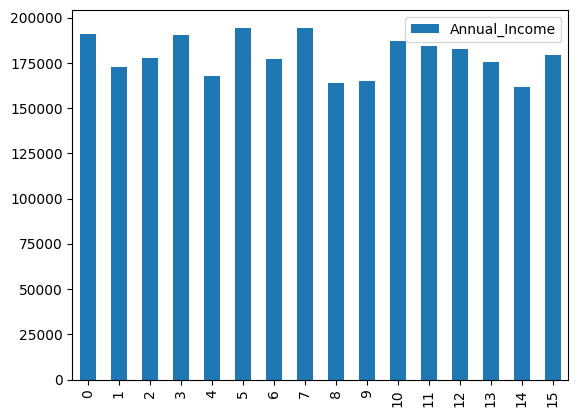

In [90]:
df.groupby('Occupation', as_index=False)['Annual_Income'].mean().plot.bar()